In [57]:
import pandas as pd
import numpy as np
import urllib
import re
import datetime
import calendar



In [58]:
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
from haversine import haversine # for calculating haversine distance
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os

In [59]:
train_data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Kaggle/nyc/nyc-taxi-trip-duration/train/train.csv")
train_data.head()
print(type(train_data['pickup_datetime'][0]))

<class 'str'>


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [61]:
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:,'pick_month'] = train_data['pickup_datetime'].dt.month
train_data.loc[:,'hour'] = train_data['pickup_datetime'].dt.hour
train_data.loc[:, 'week_of_year'] = train_data['pickup_datetime'].dt.weekofyear
train_data.loc[:, 'day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
train_data.loc[:, 'day_of_week'] = train_data['pickup_datetime'].dt.dayofweek

C:\Users\kusha\AppData\Local\Temp\ipykernel_1232\3239927452.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data.loc[:, 'week_of_year'] = train_data['pickup_datetime'].dt.weekofyear


In [62]:
train_data.head() 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5


In [63]:
#lets talk about test dataset
test_data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Kaggle/nyc/nyc-taxi-trip-duration/test/test.csv")
test_data.shape

(625134, 9)

In [36]:
test_data=test_data.copy()
test_data['pickup_datetime']=pd.to_datetime(test_data.pickup_datetime)
test_data.loc[:, 'pick_month'] = test_data['pickup_datetime'].dt.month
test_data.loc[:, 'hour'] = test_data['pickup_datetime'].dt.hour
test_data.loc[:, 'week_of_year'] = test_data['pickup_datetime'].dt.weekofyear
test_data.loc[:, 'day_of_year'] = test_data['pickup_datetime'].dt.dayofyear
test_data.loc[:, 'day_of_week'] = test_data['pickup_datetime'].dt.dayofweek
test_data.head()


C:\Users\kusha\AppData\Local\Temp\ipykernel_1232\1964792467.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_data.loc[:, 'week_of_year'] = test_data['pickup_datetime'].dt.weekofyear


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pick_month,hour,week_of_year,day_of_year,day_of_week
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,6,23,26,182,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,6,23,26,182,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,6,23,26,182,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,6,23,26,182,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,6,23,26,182,3


In [64]:
test_data.shape

(625134, 9)

In [65]:
train_data_renewed=train_data.drop('dropoff_datetime',axis=1)
print(train_data_renewed.shape,test_data.shape)


(1458644, 15) (625134, 9)


In [66]:
import math
 
# Python 3 program for the
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))

    return rad * c

dist=haversine(-73.982155,40.767937,-73.964630,40.765602) 
print(dist)   


train_data_renewed['distance']=np.vectorize(haversine)(train_data_renewed['pickup_longitude'],train_data_renewed['pickup_latitude'],train_data_renewed['dropoff_longitude'],train_data_renewed['dropoff_latitude'])


1.9500090589636532


In [67]:
test_data['distance']=np.vectorize(haversine)(test_data['pickup_longitude'],test_data['pickup_latitude'],test_data['dropoff_longitude'],test_data['dropoff_latitude'])
test_data['distance']

0          0.789473
1          0.899670
2          1.277991
3          3.607318
4          0.983047
            ...    
625129     0.359131
625130     6.006869
625131    10.643048
625132    14.439881
625133     2.129493
Name: distance, Length: 625134, dtype: float64

In [68]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,0.789473
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,0.899670
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.277991
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,3.607318
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.983047


In [69]:
train_data_renewed.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0,1.949977
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6,2.132178
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1,3.359039
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2,0.475519
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5,0.328461


In [43]:
train_data_ref=train_data_renewed.drop(['pickup_datetime','store_and_fwd_flag'],axis=1)
test_data_ref=train_data_renewed.drop(['pickup_datetime','store_and_fwd_flag'],axis=1)
train_data_ref.head()
train_data_ref['distance'][0]

1.9499774034667177

In [44]:
train_data_ref.head(8)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,17,11,74,0,1.949977
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,0,23,164,6,2.132178
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,11,3,19,1,3.359039
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,19,14,97,2,0.475519
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,13,12,86,5,0.328461
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,443,1,22,4,30,5,1.047816
6,id1813257,1,4,-73.969017,40.757839,-73.957405,40.765896,341,6,22,24,169,4,1.314693
7,id1324603,2,1,-73.969276,40.797779,-73.922470,40.760559,1551,5,7,20,142,5,5.328986


In [45]:
#model training
from sklearn.linear_model import Ridge
import numpy as np
clf=Ridge(alpha=0.01)  

x=train_data_ref.drop(['trip_duration','id'],axis=1)
y=train_data_ref['trip_duration'] 
clf.fit(x,y)
result=clf.predict(test_data[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pick_month','hour','week_of_year','day_of_year','day_of_week','distance']])



In [46]:
print(result)

[ 714.21836528  864.89397261  791.95975361 ... 1560.26095984 1845.58476078
  833.04146637]


In [47]:
train_data_ref.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,17,11,74,0,1.949977
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,0,23,164,6,2.132178
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,11,3,19,1,3.359039
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,19,14,97,2,0.475519
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,13,12,86,5,0.328461


In [48]:
[col for col in train_data_renewed.columns  if col not in test_data.columns]

['trip_duration']

In [49]:
# need to solve using lambda
import pandas as pd
  
# creating and initializing a list
values= [['Rohan',455],['Elvish',250],['Deepak',495],
         ['Soni',400],['Radhika',350],['Vansh',450]]
 
# creating a pandas dataframe
df = pd.DataFrame(values,columns=['Name','Total_Marks'])
df

,Name,Total_Marks
0,Rohan,455
1,Elvish,250
2,Deepak,495
3,Soni,400
4,Radhika,350
5,Vansh,450


In [50]:
df=df.assign(Percentage=lambda x: (x['Total_Marks']/500*100))
df

,Name,Total_Marks,Percentage
0,Rohan,455,91.0
1,Elvish,250,50.0
2,Deepak,495,99.0
3,Soni,400,80.0
4,Radhika,350,70.0
5,Vansh,450,90.0


In [51]:
df=df.assign(x =df['Name'].astype(str).str[0])
df

,Name,Total_Marks,Percentage,x
0,Rohan,455,91.0,R
1,Elvish,250,50.0,E
2,Deepak,495,99.0,D
3,Soni,400,80.0,S
4,Radhika,350,70.0,R
5,Vansh,450,90.0,V


In [52]:
df=df.apply( lambda x: np.square(x) if x.name=='Percentage' else x,axis=0 )
df

,Name,Total_Marks,Percentage,x
0,Rohan,455,8281.0,R
1,Elvish,250,2500.0,E
2,Deepak,495,9801.0,D
3,Soni,400,6400.0,S
4,Radhika,350,4900.0,R
5,Vansh,450,8100.0,V


In [53]:
def get_stats(df,f1,f2):
    df_cols=df.groupby([f1])[[f2]].agg(["mean","var","std","median","size"]).reset_index()
    df_cols=df_cols.set_index(f1)
    return df_cols 
get_stats(train_data_renewed,'pickup_datetime','trip_duration')     

trip_duration                     
                             mean var std  median size
pickup_datetime                                       
2016-01-01 00:00:17         849.0 NaN NaN   849.0    1
2016-01-01 00:00:53        1294.0 NaN NaN  1294.0    1
2016-01-01 00:01:01         408.0 NaN NaN   408.0    1
2016-01-01 00:01:14         280.0 NaN NaN   280.0    1
2016-01-01 00:01:20         736.0 NaN NaN   736.0    1
...                           ...  ..  ..     ...  ...
2016-06-30 23:58:52         472.0 NaN NaN   472.0    1
2016-06-30 23:59:09         754.0 NaN NaN   754.0    1
2016-06-30 23:59:10        2546.0 NaN NaN  2546.0    1
2016-06-30 23:59:37        1442.0 NaN NaN  1442.0    1
2016-06-30 23:59:39        2609.0 NaN NaN  2609.0    1

[1380222 rows x 5 columns]

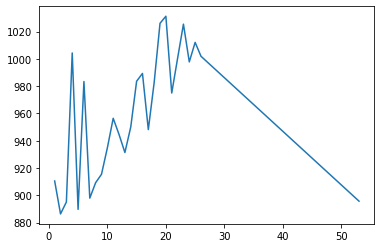

In [54]:
train_hour=get_stats(train_data_renewed,'week_of_year','trip_duration')
plt.plot(train_hour[('trip_duration','mean')])


Text(0, 0.5, 'Avergae log trip distance')

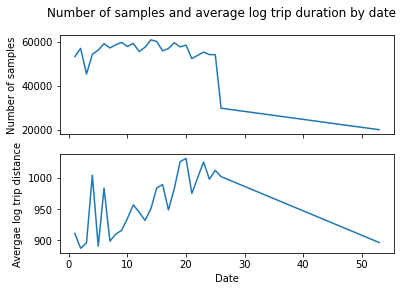

In [55]:
fig,ax=plt.subplots(nrows=2,sharex=True,sharey=False)
ax[0].plot(train_hour[('trip_duration','size')])
fig.suptitle("Number of samples and average log trip duration by date")
ax[0].set_ylabel("Number of samples")

ax[1].plot(train_hour[('trip_duration','mean')])
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Avergae log trip distance")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

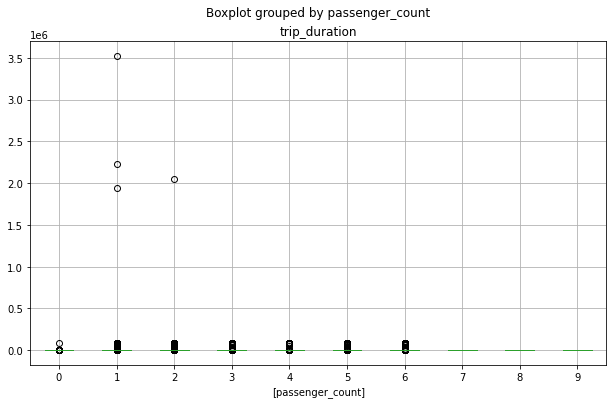

In [56]:
pclt=train_data_renewed[['passenger_count','trip_duration']].boxplot(by="passenger_count",figsize=(10,6))
plt.set_xlabel("Number of Passengers")
plt.set_ylabel("trip duration")
plt.set_title("distribution of time duration of passengers") 





 

In [ ]:
filter_train=train_data_renewed[train_data_renewed['trip_duration']<100000]
filter_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0,1.949977
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6,2.132178
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1,3.359039
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2,0.475519
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5,0.328461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,14,99,4,1.422852
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,7,1,10,6,3.738324
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,16,113,4,5.378568
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,1,5,1,0.864019


Text(0, 0.5, 'Trip Duration')

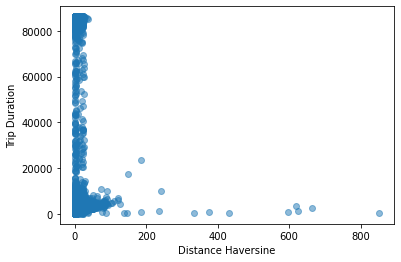

In [ ]:
fig,ax=plt.subplots(ncols=1,nrows=1)
ax.scatter(filter_train['distance'],filter_train['trip_duration'],alpha=0.5)
ax.set_xlabel("Distance Haversine")
ax.set_ylabel("Trip Duration")

In [ ]:
filter_train['avg_speed']=1000*filter_train['distance']/filter_train['trip_duration']
filter_train

C:\Users\kusha\AppData\Local\Temp\ipykernel_22140\1412593259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_train['avg_speed']=1000*filter_train['distance']/filter_train['trip_duration']


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance,avg_speed
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0,1.949977,4.285665
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6,2.132178,3.215955
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1,3.359039,1.581468
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2,0.475519,1.108436
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5,0.328461,0.755083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,14,99,4,1.422852,1.828858
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,7,1,10,6,3.738324,5.707365
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,16,113,4,5.378568,7.040010
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,1,5,1,0.864019,2.316405


In [ ]:
filter_train.groupby("hour").mean()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pick_month,week_of_year,day_of_year,day_of_week,distance,avg_speed
hour,,,,,,,,,,,,,
0,1.538753,1.690987,-73.975849,40.743408,-73.970525,40.746538,900.245873,3.560107,14.366237,93.351663,3.786730,3.170501,3.811046
1,1.530995,1.709393,-73.979639,40.742079,-73.969344,40.746525,903.087112,3.527650,14.541184,92.296051,4.097871,3.097140,3.934976
2,1.514872,1.704740,-73.982802,40.741626,-73.969254,40.745715,890.076934,3.501144,14.687008,91.400400,4.297548,2.983982,4.007586
3,1.502321,1.705863,-73.983311,40.741756,-73.966214,40.745817,890.070878,3.505767,14.948552,91.485331,4.369419,3.273055,4.335970
4,1.504369,1.704281,-73.978561,40.745168,-73.956232,40.745953,921.976444,3.530775,14.842009,92.380572,4.008232,4.203712,5.060904
5,1.494667,1.577190,-73.968918,40.748525,-73.955054,40.747010,822.298960,3.557592,14.202240,93.228636,2.970737,5.060899,5.856047
6,1.512227,1.536981,-73.969337,40.750759,-73.966551,40.752435,730.457034,3.566638,13.826150,93.355009,2.506752,3.697420,4.704523
7,1.531151,1.575665,-73.970351,40.754659,-73.971830,40.754908,831.758345,3.534802,13.528453,92.211745,2.447644,2.891640,3.484435
8,1.536143,1.608683,-73.973077,40.754960,-73.975281,40.753289,924.559199,3.517262,13.467869,91.792075,2.542049,2.536138,2.857275


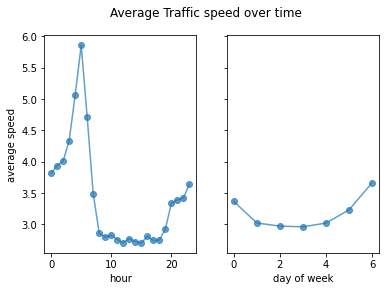

In [ ]:
fig,ax=plt.subplots(ncols=2,sharey=True)
ax[0].plot(filter_train.groupby("hour").mean()['avg_speed'],'o-',alpha=0.7)
ax[1].plot(filter_train.groupby('day_of_week').mean()['avg_speed'],'o-',alpha=0.7)

ax[0].set_xlabel("hour")
ax[0].set_ylabel('average speed')

ax[1].set_xlabel("day of week")
fig.suptitle("Average Traffic speed over time")
plt.show()


Text(0, 0.5, 'Total Travel Time')

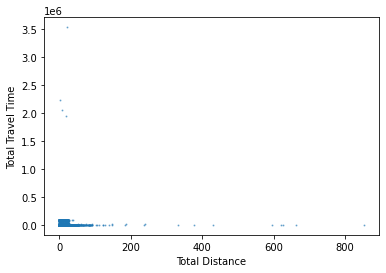

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train_data_renewed['distance'], train_data_renewed['trip_duration'], s=1, alpha=0.5)
ax.set_xlabel("Total Distance")
ax.set_ylabel("Total Travel Time")

In [ ]:
import pandas as pd
train_data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Kaggle/nyc/nyc-taxi-trip-duration/train/train.csv")
train_data_renewed['store']=train_data['store_and_fwd_flag']
test_data['store']=test_data['store_and_fwd_flag']

In [ ]:
train_data_renewed

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance,store
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0,1.949977,N
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6,2.132178,N
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1,3.359039,N
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2,0.475519,N
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5,0.328461,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,14,99,4,1.422852,N
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,7,1,10,6,3.738324,N
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,16,113,4,5.378568,N
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,1,5,1,0.864019,N


In [ ]:
train_data_renewed['store'].replace(['N','Y'],
                        [0, 1], inplace=True)

test_data['store'].replace(['N','Y'],
                        [0, 1], inplace=True)                      

In [ ]:
train_data_renewed=train_data_renewed.drop('store_and_fwd_flag',axis=1)
test_data=test_data.drop('store_and_fwd_flag',axis=1)

In [ ]:
train_data_renewed

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance,store
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455,3,17,11,74,0,1.949977,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663,6,0,23,164,6,2.132178,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,11,3,19,1,3.359039,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429,4,19,14,97,2,0.475519,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435,3,13,12,86,5,0.328461,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,778,4,13,14,99,4,1.422852,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,655,1,7,1,10,6,3.738324,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,764,4,6,16,113,4,5.378568,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,373,1,15,1,5,1,0.864019,0


In [ ]:
#Modelling


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [ ]:
x=train_data_renewed.loc[:,~train_data_renewed.columns.isin(['trip_duration','id','pickup_datetime'])]
y=np.log(train_data_renewed['trip_duration'])


NameError: name 'train_data_renewed' is not defined

In [ ]:
xtr,xv,ytr,yv=train_test_split(x,y,test_size=0.2,random_state=6)
xtr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pick_month,hour,week_of_year,day_of_year,day_of_week,distance,store
846923,1,1,-73.969414,40.785042,-73.954842,40.780708,3,6,10,69,2,1.625808,0
698081,2,1,-73.965797,40.762619,-73.955833,40.767860,4,17,13,94,6,1.119586,0
1108048,2,1,-73.989197,40.742336,-73.998756,40.763729,5,20,19,132,2,1.249064,0
77455,1,1,-73.982361,40.758091,-73.970352,40.750771,3,14,11,76,2,1.354075,0
1173238,2,1,-73.956688,40.775391,-73.959091,40.801048,3,10,10,73,6,0.832467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008464,2,5,-74.005371,40.746010,-73.987244,40.757961,6,8,23,162,4,2.048708,0
827727,1,1,-73.986641,40.738216,-73.906364,40.903919,6,22,24,166,1,10.278171,0
1244525,2,1,-73.953819,40.775040,-73.993698,40.679691,2,16,6,45,6,5.313268,0
903881,2,1,-74.001671,40.745930,-73.990288,40.728909,3,21,9,65,5,1.369083,0


In [ ]:
x_test=test_data.loc[:,~test_data.columns.isin(['trip_duration','id','pickup_datetime'])]
x_test.drop("store_and_fwd_flag",axis=1)

KeyError: "['store_and_fwd_flag'] not found in axis"

In [ ]:
param_grid={'max_depth': np.arange(3, 10)}
tree=GridSearchCV(DecisionTreeRegressor(), param_grid)
tree.fit(xtr,ytr)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [ ]:
tree.best_params_

{'max_depth': 9}

In [ ]:
y_pred = tree.predict(xv)
print(y_pred)
rmsle = np.sqrt(sum(np.square(y_pred - yv)) / len(y_pred))
print("rmsle of decision tree is: %.3f"%rmsle)


[5.54286556 5.79233813 6.33792787 ... 6.54664803 6.64121768 7.48113671]
rmsle of decision tree is: 0.515


<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

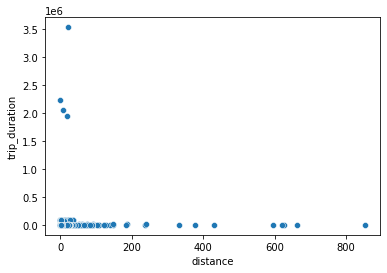

In [70]:
# interesting topic -> Anomaly detection using isolation forest
sns.scatterplot(data=train_data_renewed,x='distance',y='trip_duration')


In [75]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=42,contamination=0.01)
train_data_renewed['Anomaly']=clf.fit_predict(train_data_renewed[['distance','trip_duration']])
train_data_renewed['Anomaly'].value_counts()


C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    1444059
-1      14585
Name: Anomaly, dtype: int64

In [76]:
train_data_renewed

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,week_of_year,day_of_year,day_of_week,distance,Anomaly
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0,1.949977,1
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6,2.132178,1
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1,3.359039,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2,0.475519,1
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5,0.328461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,14,99,4,1.422852,1
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,7,1,10,6,3.738324,1
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,16,113,4,5.378568,1
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,1,5,1,0.864019,1


In [130]:
# working with isolation forest
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import make_blobs
n_samples=500
outliers_fraction=0.05
n_outliers=int(outliers_fraction*n_samples)
n_inliners=n_samples-n_outliers

blobs_params_=dict(random_state=0,n_samples=n_inliners,n_features=2)




In [131]:
print(blobs_params_)

{'random_state': 0, 'n_samples': 475, 'n_features': 2}


In [132]:
x=make_blobs(centers=[[0,0],[0,0]],cluster_std=0.5,**blobs_params_)[0]
print(x.shape)
rng=np.random.RandomState(42)

(475, 2)


In [133]:

x=np.concatenate([x,rng.uniform(low=6,high=6,size=(n_outliers,2))],axis=0)
x.shape

(500, 2)

In [134]:
iforest=IsolationForest(n_estimators=20,verbose=2)
iforest.fit(x)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=2)

In [135]:
pred=iforest.predict(x)

In [136]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

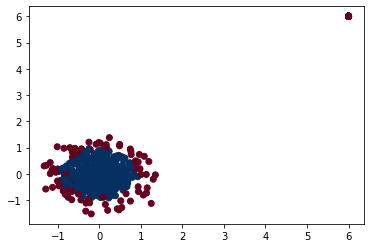

In [137]:
plt.scatter(x[:, 0], x[:, 1], c=pred, cmap='RdBu')

In [141]:
pred_scores = -1*iforest.score_samples(X)
pred_scores

array([0.72183545, 0.68926982, 0.72183545, 0.72183545, 0.72183545,
       0.72183545, 0.72183545, 0.72183545, 0.72923979, 0.72183545,
       0.72183545, 0.72183545, 0.72183545, 0.72183545, 0.72183545,
       0.72183545, 0.72183545, 0.72923979, 0.72183545, 0.7302944 ,
       0.72183545, 0.72923979, 0.72183545, 0.72183545, 0.72183545,
       0.72183545, 0.72183545, 0.72183545, 0.72183545, 0.63442898,
       0.7302944 , 0.7302944 , 0.72923979, 0.72183545, 0.72923979,
       0.72576502, 0.72183545, 0.72183545, 0.72183545, 0.72183545,
       0.72183545, 0.72923979, 0.72183545, 0.72183545, 0.72923979,
       0.72183545, 0.72183545, 0.7302944 , 0.72183545, 0.7302944 ,
       0.72576502, 0.72183545, 0.72183545, 0.72183545, 0.63395419,
       0.72183545, 0.72923979, 0.72183545, 0.72183545, 0.72923979,
       0.72183545, 0.72183545, 0.72183545, 0.72183545, 0.71782656,
       0.7302944 , 0.72923979, 0.59573651, 0.72183545, 0.72183545,
       0.72576502, 0.72183545, 0.72183545, 0.7302944 , 0.72183

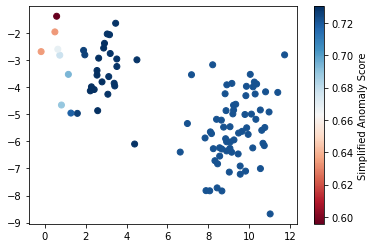

In [142]:
plt.scatter(X[:, 0], X[:, 1], c=pred_scores, cmap='RdBu')
plt.colorbar(label='Simplified Anomaly Score')
plt.show()